In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
url = 'https://raw.githubusercontent.com/SohelRaja/ML_repo_college/master/Decision%20Tree%20with%20Python/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco=telco.drop(['customerID','TotalCharges'] , axis=1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


### Data cleaning and data handling

In [38]:
telco['Partner'].replace(to_replace=[['No'],['Yes']],value=['PartnerNo','PartnerYes'],inplace=True)
telco['Dependents'].replace(to_replace=[['No'],['Yes']],value=['Independent','Dependent'],inplace=True)
telco['PhoneService'].replace(to_replace=[['No'],['Yes']],value=['PSNo','PSYes'],inplace=True)
telco['PaperlessBilling'].replace(to_replace=[['No'],['Yes']],value=['PLBNo','PLBYes'],inplace=True)
telco['MultipleLines'].replace(to_replace=[['No phone service'],['No'],['Yes']],value=['MLNo','MLNo','MLYes'],inplace=True)
telco['OnlineSecurity'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['OSNo','OSNo','OSYes'],inplace=True)
telco['OnlineBackup'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['OBNo','OBNo','OBYes'],inplace=True)
telco['DeviceProtection'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['DPNo','DPNo','DPYes'],inplace=True)
telco['TechSupport'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['TSNo','TSNo','TSYes'],inplace=True)
telco['StreamingTV'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['STVNo','STVNo','STVYes'],inplace=True)
telco['StreamingMovies'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['SMNo','SMNo','SMYes'],inplace=True)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,PartnerYes,Independent,1,PSNo,MLNo,DSL,OSNo,OBYes,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,29.85,No
1,Male,0,PartnerNo,Independent,34,PSYes,MLNo,DSL,OSYes,OBNo,DPYes,TSNo,STVNo,SMNo,One year,PLBNo,Mailed check,56.95,No
2,Male,0,PartnerNo,Independent,2,PSYes,MLNo,DSL,OSYes,OBYes,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Mailed check,53.85,Yes
3,Male,0,PartnerNo,Independent,45,PSNo,MLNo,DSL,OSYes,OBNo,DPYes,TSYes,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),42.30,No
4,Female,0,PartnerNo,Independent,2,PSYes,MLNo,Fiber optic,OSNo,OBNo,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,70.70,Yes


In [39]:
telco['gender'].replace(to_replace=[['Female'],['Male']],value=[0,1],inplace=True)
telco['Partner'].replace(to_replace=[['PartnerNo'],['PartnerYes']],value=[0,1],inplace=True)
telco['Dependents'].replace(to_replace=[['Independent'],['Dependent']],value=[0,1],inplace=True)
telco['PhoneService'].replace(to_replace=[['PSNo'],['PSYes']],value=[0,1],inplace=True)
telco['PaperlessBilling'].replace(to_replace=[['PLBNo'],['PLBYes']],value=[0,1],inplace=True)
telco['MultipleLines'].replace(to_replace=[['MLNo'],['MLYes']],value=[0,1],inplace=True)
telco['OnlineSecurity'].replace(to_replace=[['OSNo'],['OSYes']],value=[0,1],inplace=True)
telco['OnlineBackup'].replace(to_replace=[['OBNo'],['OBYes']],value=[0,1],inplace=True)
telco['DeviceProtection'].replace(to_replace=[['DPNo'],['DPYes']],value=[0,1],inplace=True)
telco['TechSupport'].replace(to_replace=[['TSNo'],['TSYes']],value=[0,1],inplace=True)
telco['StreamingTV'].replace(to_replace=[['STVNo'],['STVYes']],value=[0,1],inplace=True)
telco['StreamingMovies'].replace(to_replace=[['SMNo'],['SMYes']],value=[0,1],inplace=True)
telco['InternetService'].replace(to_replace=[['DSL'],['Fiber optic'],['No']],value=[0,1,2],inplace=True)
telco['PaymentMethod'].replace(to_replace=[['Electronic check'],['Mailed check'],['Bank transfer (automatic)'],['Credit card (automatic)']],value=[0,1,2,3],inplace=True)
telco['Contract'].replace(to_replace=[['Month-to-month'], ['One year'], ['Two year']],value=[0,1,2],inplace=True)
telco['Churn'].replace(to_replace=[['No'], ['Yes']],value=[0,1],inplace=True)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,1


In [0]:
# #telco['TotalCharges'].apply(pd.to_numeric)
# telco['TotalCharges']=telco['TotalCharges'].astype(str)
# list(telco.TotalCharges)
# telco.TotalCharges.dtype

In [41]:
df=telco
df_1=df[df['Churn']==1]
df_0=df[df['Churn']==0]
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


# Clustering

In [42]:
!pip install kmodes

# Kprotoypes clustering

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 8504824.028869752
Init: initial

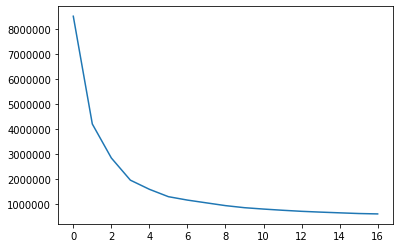

In [46]:
# Determining the optimal value of K ( by Elbow method)
cost = []
for n in list(range(1,18)):
    kproto = KPrototypes(n_clusters=n, init='Cao', verbose=2)
    kproto.fit_predict(df_0, categorical=[2,3,5,6,7,8,9,10,11,12,13,14,15,16,18])
    cost.append(kproto.cost_)
    print("K=",n,"COST is: ",kproto.cost_)
    
print("COST list is :", cost)
plt.plot(cost)

In [0]:
num_of_clusters= 3     # By Elbow method

### Kprotoypes clustering for the dataset where Y=0

In [48]:
import numpy as np
from kmodes.kprototypes import KPrototypes


kproto = KPrototypes(n_clusters=num_of_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(df_0, categorical=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,18])


# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 874, ncost: 3183006.6937812264
Run: 1, iteration: 2/100, moves: 410, ncost: 3073349.168198865
Run: 1, iteration: 3/100, moves: 224, ncost: 3038994.308044307
Run: 1, iteration: 4/100, moves: 110, ncost: 3030958.534829461
Run: 1, iteration: 5/100, moves: 24, ncost: 3030527.6846879967
Run: 1, iteration: 6/100, moves: 8, ncost: 3030476.2973739235
Run: 1, iteration: 7/100, moves: 10, ncost: 3030393.638978118
Run: 1, iteration: 8/100, moves: 7, ncost: 3030326.3437156193
Run: 1, iteration: 9/100, moves: 4, ncost: 3030306.0822171276
Run: 1, iteration: 10/100, moves: 2, ncost: 3030299.391571654
Run: 1, iteration: 11/100, moves: 0, ncost: 3030299.391571654
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 740, ncost: 2886819.3075586976
Run: 2, iteration: 2/100, moves: 254, ncost: 2861225.3225324345
Run: 2, iteration: 3/100

In [52]:
for i in range(number_of_clusters):
  print("\nCentroid:",i+1,"\n")
  print("\nCentroid:",i+1,"\n\n(Numeric)\t\t\t\t\t\t(Categorical)\n")
  print(list(np.rint(np.around(kproto.cluster_centroids_[0][i],1))), end=' ')
  print(list(np.rint(np.around(kproto.cluster_centroids_[1][i],1))))
  


Centroid: 1 


Centroid: 1 

(Numeric)						(Categorical)

[32.0, 25.0] [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0]

Centroid: 2 


Centroid: 2 

(Numeric)						(Categorical)

[59.0, 90.0] [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0]

Centroid: 3 


Centroid: 3 

(Numeric)						(Categorical)

[17.0, 70.0] [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


### Kprototypes clustering for the dataset where Y=1

In [53]:
import numpy as np
from kmodes.kprototypes import KPrototypes


kproto = KPrototypes(n_clusters=num_of_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(df_1, categorical=[2,3,5,6,7,8,9,10,11,12,13,14,15,16,18])


# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 344, ncost: 670411.6142997534
Run: 1, iteration: 2/100, moves: 263, ncost: 604444.1222063784
Run: 1, iteration: 3/100, moves: 84, ncost: 598500.2048752407
Run: 1, iteration: 4/100, moves: 17, ncost: 598197.8024491938
Run: 1, iteration: 5/100, moves: 2, ncost: 598192.3914158929
Run: 1, iteration: 6/100, moves: 0, ncost: 598192.3914158929
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 329, ncost: 609606.724002228
Run: 2, iteration: 2/100, moves: 108, ncost: 599185.9551904625
Run: 2, iteration: 3/100, moves: 24, ncost: 598469.0672596504
Run: 2, iteration: 4/100, moves: 12, ncost: 598251.1842481397
Run: 2, iteration: 5/100, moves: 6, ncost: 598192.2349013467
Run: 2, iteration: 6/100, moves: 0, ncost: 598192.2349013467
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration

In [54]:
for i in range(num_of_clusters):
  print("\nCentroid:",i+1,"\n\n(Numeric)\t\t\t\t\t\t(Categorical)\n")
  print(list(np.rint(np.around(kproto.cluster_centroids_[0][i],1))), end=' ')
  print(list(np.rint(np.around(kproto.cluster_centroids_[1][i],1))))
  


Centroid: 1 

(Numeric)						(Categorical)

[0.0, 0.0, 47.0, 94.0] [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]

Centroid: 2 

(Numeric)						(Categorical)

[0.0, 0.0, 9.0, 83.0] [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]

Centroid: 3 

(Numeric)						(Categorical)

[0.0, 0.0, 9.0, 39.0] [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
